<a href="https://colab.research.google.com/github/LCaravaggio/AnalisisPredictivo/blob/master/api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bajar de API

In [1]:
import requests
import urllib.parse

In [2]:
API_BASE_URL = "http://apis.datos.gob.ar/series/api/"

In [3]:
def get_api_call(ids, **kwargs):
    kwargs["ids"] = ",".join(ids)
    return "{}{}?{}".format(API_BASE_URL, "series", urllib.parse.urlencode(kwargs))

In [4]:
api_call = get_api_call(["116.4_TCRZE_2015_D_36_4"], start_date="2020-05")
print(api_call)

http://apis.datos.gob.ar/series/api/series?start_date=2020-05&ids=116.4_TCRZE_2015_D_36_4


In [5]:
requests.get(api_call).json()

{'count': 445,
 'data': [['2020-05-01', 113.11234589928377],
  ['2020-05-02', 113.0514658722108],
  ['2020-05-03', 112.99061861236292],
  ['2020-05-04', 112.21002983245108],
  ['2020-05-05', 112.0716492155335],
  ['2020-05-06', 111.33422104334925],
  ['2020-05-07', 110.75292955000178],
  ['2020-05-08', 111.34859884581894],
  ['2020-05-09', 111.2886681136042],
  ['2020-05-10', 111.22876963767918],
  ['2020-05-11', 110.875841334721],
  ['2020-05-12', 111.03689295231682],
  ['2020-05-13', 110.54475997363686],
  ['2020-05-14', 110.7013235426833],
  ['2020-05-15', 111.02337915974384],
  ['2020-05-16', 110.96362346928194],
  ['2020-05-17', 110.90389994089772],
  ['2020-05-18', 111.92285740110276],
  ['2020-05-19', 112.05323659736617],
  ['2020-05-20', 112.56213466703],
  ['2020-05-21', 113.20171362932496],
  ['2020-05-22', 113.25347053422192],
  ['2020-05-23', 113.19251455017424],
  ['2020-05-24', 113.1315913742337],
  ['2020-05-25', 113.07070098874206],
  ['2020-05-26', 114.57785091864436],

# Con Pandas

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv(get_api_call(
    ["168.1_T_CAMBIOR_D_0_0_26", "101.1_I2NG_2016_M_22", "116.3_TCRMA_0_M_36", "143.3_NO_PR_2004_A_21",
     "11.3_VMATC_2004_M_12"], 
    format="csv", start_date=2016
))

In [8]:
df

,indice_tiempo,tipo_cambio_bna_vendedor,ipc_2016_nivel_general,tipo_cambio_real_multilateral_actual,emae_original,construccion
0,2016-01-01,13.770968,NaN,96.031136,134.746450,141.661542
1,2016-02-01,14.927586,NaN,102.516379,134.232361,138.962002
2,2016-03-01,15.117742,NaN,103.073277,150.087894,140.638700
3,2016-04-01,14.623333,85.5254,97.452567,153.250674,126.026755
4,2016-05-01,14.329032,89.1118,91.498158,163.513608,134.224906
...,...,...,...,...,...,...
62,2021-03-01,96.129032,424.4539,120.183663,144.483879,148.217613
63,2021-04-01,98.100000,441.8955,117.827179,144.791807,127.848283
64,2021-05-01,99.177419,456.7856,118.332436,149.094575,114.053308
65,2021-06-01,100.225000,470.7840,117.728626,NaN,NaN


In [9]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

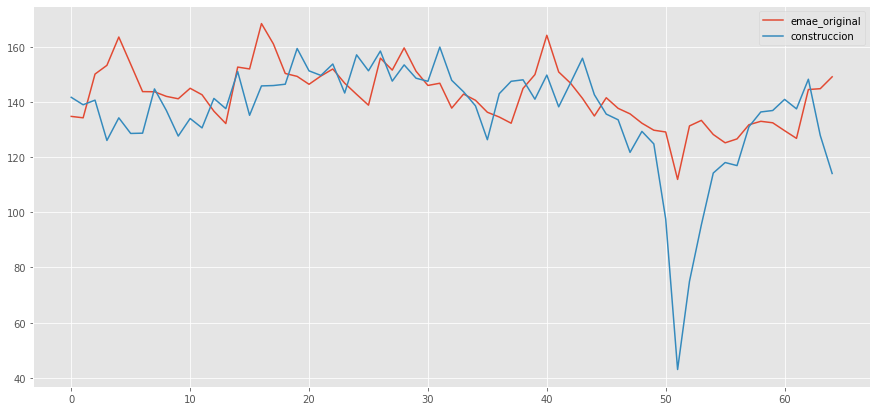

In [10]:
df[["emae_original", "construccion"]].plot(figsize=(15,7))

# Con Markdown y PDFkit

In [31]:
#!pip install pdfkit
import markdown
import pdfkit

In [ ]:
#Bajar de https://wkhtmltopdf.org/
path_wkhtmltopdf = r'C:\Program Files\wkhtmltopdf\bin\wkhtmltopdf.exe'
config = pdfkit.configuration(wkhtmltopdf=path_wkhtmltopdf)

In [20]:
tipo_cambio = requests.get(get_api_call(
    ["168.1_T_CAMBIOR_D_0_0_26:avg", "168.1_T_CAMBIOR_D_0_0_26:max", "168.1_T_CAMBIOR_D_0_0_26:min"], 
    sort="desc", collapse="month", limit=13
)).json()["data"]

In [21]:
ipc = requests.get(get_api_call(
    ["101.1_I2NG_2016_M_22"], 
    sort="desc", collapse="month", limit=13
)).json()["data"]

In [22]:
emaese = requests.get(get_api_call(
    ["143.3_NO_PR_2004_A_31"], 
    sort="desc", collapse="month", limit=13
)).json()["data"]

In [23]:
emae = requests.get(get_api_call(
    ["143.3_NO_PR_2004_A_21"], 
    sort="desc", collapse="month", limit=13
)).json()["data"]

In [24]:
varia=emae[0][1] / emae[12][1] - 1
varse=emaese[0][1] /emaese[1][1]-1
ipcm=ipc[0][1]/ipc[1][1]-1
ipcia=ipc[0][1]/ipc[12][1]-1

In [26]:
!pip install arrow
import arrow

     |████████████████████████████████| 60 kB 2.9 MB/s 


In [27]:
reporte = """
# Seguimiento de coyuntura

## Tipo de cambio

El tipo de cambio promedio del mes de {mes_tc:%Y-%m} fue {mes_tc_promedio:.2f} con un máximo de {mes_tc_max:.2f} 
y un mínimo de {mes_tc_min:.2f}.

## Inflación

La inflación de {mes_ipc:%Y-%m} respecto de {mes_ipc_anterior:%Y-%m} fue de {mes_ipc_var:.2%}, mientras que la inflación interanual
{mes_ipc:%Y-%m}/{mes_ipc_anio_anterior:%Y-%m} fue de {mes_ipc_var_interanual:.2%}.

## Nivel de actividad

El EMAE de {mes_emae:%Y-%m} muestra {alza_o_caida_mensual} respecto del mes anterior de {mes_emae_var:.2%}, y un 
{alza_o_caida_interanual} interanual de {mes_emae_var_interanual:.2%}.""".format(
mes_tc=arrow.get(tipo_cambio[2][0]).datetime,
mes_tc_promedio=tipo_cambio[2][1],
mes_tc_max=tipo_cambio[2][2],
mes_tc_min=tipo_cambio[2][3],
mes_ipc=arrow.get(ipc[0][0]).datetime,
mes_ipc_anterior=arrow.get(ipc[1][0]).datetime,
mes_ipc_var=ipcm,
mes_ipc_anio_anterior=arrow.get(ipc[12][0]).datetime,
mes_ipc_var_interanual=ipcia,
mes_emae=arrow.get(emae[0][0]).datetime, 
alza_o_caida_mensual="alza" if varse >= 0 else "caída",
mes_emae_var=varse,
alza_o_caida_interanual="alza" if varia >= 0 else "caída",
mes_emae_var_interanual = varia
)


In [28]:
from IPython.core.display import display, HTML

# genera un HTML a partir del markdown
html = markdown.markdown(reporte)
display(HTML(html))

In [ ]:
# genera un PDF a partir del HTML
pdfkit.from_string(html,'reporte-series-tiempo.pdf', options={"encoding": "utf8"})